1. STT: 17
2. Nguyễn Thị Mai Phương
3. Buổi 04 - lab 05

#Câu 1: tạo dataframe từ dữ liệu thô

In [ ]:
import numpy as np
import pandas as pd
url = 'https://raw.githubusercontent.com/datasethub/ds105/master/Lab_Model_Development.csv'
df = pd.read_csv(url)

In [ ]:
# Xuất 10 sample bất kỳ
df.sample(10)

curb-weight  engine-size    length  ...  wheel-base  bore    price
188         2579           97  0.865930  ...       100.4  3.01  13845.0
185         2254          109  0.765497  ...        94.5  3.19  11595.0
6           2844          136  0.925997  ...       105.8  3.19  17710.0
137         2145          108  0.826526  ...        97.2  3.62   7126.0
90          2024           97  0.817876  ...        94.5  3.15   7349.0
88          1918           97  0.794330  ...        94.5  3.15   6649.0
60          2443          122  0.854397  ...        98.8  3.39  10795.0
111         3485          152  0.955790  ...       114.2  3.70  17075.0
157         2122           98  0.799135  ...        95.7  3.19   8358.0
87          2017          103  0.794330  ...        94.5  2.99   7099.0

[10 rows x 10 columns]

In [ ]:
# Số lượng sample, feature
df.shape

(201, 10)

# Câu 2: kiểm tra kiểu dữ liệu của các feature, kiểm tra dataset bị khuyết

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   curb-weight  201 non-null    int64  
 1   engine-size  201 non-null    int64  
 2   length       201 non-null    float64
 3   width        201 non-null    float64
 4   horsepower   201 non-null    float64
 5   city-mpg     201 non-null    int64  
 6   highway-mpg  201 non-null    int64  
 7   wheel-base   201 non-null    float64
 8   bore         201 non-null    float64
 9   price        201 non-null    float64
dtypes: float64(6), int64(4)
memory usage: 15.8 KB


In [ ]:
df.isnull().sum(axis=0)

curb-weight    0
engine-size    0
length         0
width          0
horsepower     0
city-mpg       0
highway-mpg    0
wheel-base     0
bore           0
price          0
dtype: int64

-> kiểu dữ liệu của các feature  là phù hợp và dataset không có giá trị bị khuyết

# Câu 3: Phát triển mô hình Polynomial Regression bậc 3 để sự đoán giá xe từ biến 'highway-mpg'

In [ ]:
x = df['highway-mpg']
y = df['price']

In [ ]:
from sklearn.preprocessing import  PolynomialFeatures
pr_c3 = PolynomialFeatures(degree=3, include_bias=False)
X_poly_c3 = pr_c3.fit_transform(df[['highway-mpg']])
X_poly_c3.shape

(201, 3)

In [ ]:
from sklearn.linear_model import LinearRegression

poly_c3 = LinearRegression()
poly_c3.fit(X_poly_c3, df['price'])
Yhat_c3 = poly_c3.predict(X_poly_c3)
Yhat_c3

array([14483.47732607, 14483.47732607, 15876.76908652, 11210.24198667,
       23210.06482402, 17436.73388684, 17436.73388684, 17436.73388684,
       28063.54752614, 12159.55360585, 12159.55360585, 13247.51877575,
       13247.51877575, 17436.73388684, 23210.06482402, 23210.06482402,
       28063.54752614,  6162.84640189,  7237.04153267,  7237.04153267,
        7247.75722474,  7486.4972933 , 11210.24198667,  7486.4972933 ,
        7486.4972933 ,  7486.4972933 , 11210.24198667, 11210.24198667,
       19172.71155671,  5739.27108586,  7486.4972933 ,  7233.78149649,
        8612.73442281,  8612.73442281,  8612.73442281,  8612.73442281,
        9100.83013627,  9100.83013627,  9100.83013627,  9100.83013627,
       13247.51877575, 10390.24408849, 12159.55360585, 12159.55360585,
       30819.68698954, 30819.68698954, 37037.46128959, 10390.24408849,
        7486.4972933 ,  7486.4972933 ,  7486.4972933 ,  7486.4972933 ,
       21094.04192587, 21094.04192587, 21094.04192587, 21094.04192587,
      

# Câu 4: Tính MSE và R^2 để đánh giá tập mẫu của mô hình poly = phương pháp thủ công, phát họa distribution plot để đánh giá mô hình

## Tính MSE thủ công

In [ ]:
gen_mse = (y-Yhat_c3)*(y-Yhat_c3)
#sum_gen_mse = gen_mse.sum(axis=0)
MSE = np.mean(gen_mse)
print('MSE = ',MSE)

MSE =  20474146.42636122


In [ ]:
# Thử tính lại MSE bằng cách sử dụng mô đun metrics
from sklearn.metrics import  mean_squared_error
mean_squared_error(df['price'], Yhat_c3)

20474146.426361226

## Tính R^2 thủ công

In [ ]:
# Tính y trung bình
y_bar = np.mean(y) 
# tính MSE của y trung bình
SST_ = (y - y_bar)*(y-y_bar)
SST = np.mean(SST_)
R_squared = 1-(MSE/SST)
R_squared

0.6741946663906515

In [ ]:
# Thử tính bằng score
poly_c3.score(X_poly_c3, df['price'])

0.6741946663906517

## distribution plot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


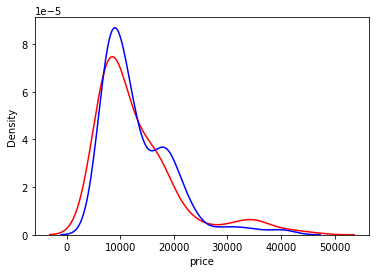

In [ ]:
import seaborn as sns

ax1 = sns.distplot(df['price'], hist = False, color = "r", label = "Actual Value")
sns.distplot(Yhat_c3, hist = False, color = "b", label = "Fiited Values", ax = ax1)

# Câu 5: Phát triển mô hình hồi quy tuyến tính đa biến để dự đoán giá xe từ biến 'horsepower', 'curb-weight', 'engine-size', 'highway-mpg'

In [ ]:
from sklearn.linear_model import LinearRegression

lm_c5 = LinearRegression()
Z_c5 = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
lm_c5.fit(Z_c5, df['price'])
Yhat_5 = lm_c5.predict(Z_c5)

#Câu 6: Tính MSE và R^2  bằng phương pháp thủ công và gọi hàm. Phát họa distribution

## Tính MSE

In [ ]:
# Tính bằng thủ công 
gen_mse_5 = (y-Yhat_5)*(y-Yhat_5)
#sum_gen_mse = gen_mse.sum(axis=0)
MSE_5 = np.mean(gen_mse_5)
print('MSE = ',MSE_5)

MSE =  11980366.870726483


In [ ]:
# Tính MSE bằng cách sử dụng mô đun metrics
from sklearn.metrics import  mean_squared_error
mean_squared_error(df['price'], Yhat_5)

11980366.87072649

## Tính R^2

In [ ]:
# Tính y trung bình
y_bar = np.mean(y) 
# tính MSE của y trung bình
SST_ = (y - y_bar)*(y-y_bar)
SST = np.mean(SST_)
R_squared = 1-(MSE_5/SST)
R_squared

0.8093562806577457

In [ ]:
# Thử tính bằng score
lm_c5.score(Z_c5, df['price'])

0.8093562806577457

## Distribution plot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


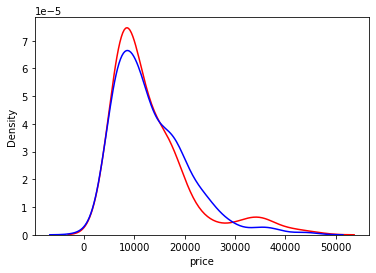

In [ ]:
import seaborn as sns

ax1 = sns.distplot(df['price'], hist = False, color = "r", label = "Actual Value")
sns.distplot(Yhat_5, hist = False, color = "b", label = "Fiited Values", ax = ax1)

-> từ hình trên ta thấy được 2 đường giá trị đã dự đoán và giá trị thực tế gần như là một nên mô hình hoạt động tốt

# Câu 7: Phát triển mô hình Polynomial Regression bậc 2 để dự đoán xe từ các biến 'horsepower', 'curb-weight', 'engine-size', 'highway-mpg'

In [ ]:
pr_c7 = PolynomialFeatures(degree=2, include_bias=False)

x_c7 = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
X_poly_c7 = pr_c7.fit_transform(x_c7)
X_poly_c7.shape

(201, 14)

In [ ]:
lm_c7 = LinearRegression()
lm_c7.fit(X_poly_c7, df['price'])




LinearRegression()

In [ ]:
Yhat_7 = lm_c7.predict(X_poly_c7)

# Câu 8: Tính MSE và R^2 bằng cách tính thủ công, hàm.Phát họa distribution plot

## Tính MSE

In [ ]:
# Tính bằng thủ công 
gen_mse_7 = (y-Yhat_7)*(y-Yhat_7)
#sum_gen_mse = gen_mse.sum(axis=0)
MSE_7 = np.mean(gen_mse_7)
print('MSE = ',MSE_7)

MSE =  9656613.403989598


In [ ]:
# Tính MSE bằng cách sử dụng mô đun metrics
from sklearn.metrics import  mean_squared_error
mean_squared_error(df['price'], Yhat_7)

9656613.4039896

## Tính R^2

In [ ]:
# Tính y trung bình
y_bar = np.mean(y) 
# tính MSE của y trung bình
SST_ = (y - y_bar)*(y-y_bar)
SST = np.mean(SST_)
R_squared_7 = 1-(MSE_7/SST)
R_squared_7

0.8463341969864727

In [ ]:
# Thử tính bằng score
lm_c7.score(X_poly_c7, df['price'])

0.8463341969864728

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


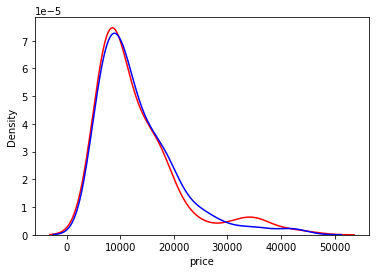

In [ ]:
import seaborn as sns

ax1 = sns.distplot(df['price'], hist = False, color = "r", label = "Actual Value")
sns.distplot(Yhat_7, hist = False, color = "b", label = "Fiited Values", ax = ax1)

-> từ hình trên ta thấy được 2 đường giá trị đã dự đoán và giá trị thực tế gần như là một nên mô hình hoạt động tốt

# Câu 9: Thiết kế một pipeline để phát triển mô hình Polynomial Regression bậc 2 để dự đoán giá xe từ biến 'horsepower', 'curb-weight', 'engine-size', 'highway-mpg'

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

Input = [('scale', StandardScaler()),
         ('polynomial', PolynomialFeatures(include_bias=False)),
        ('model', LinearRegression())]

In [ ]:
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [ ]:
Z_c9 = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
pipe.fit(Z_c9,df['price'])

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [ ]:
ypipe = pipe.predict(Z_c9)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [ ]:
# Tính R^ 2
pipe.score(Z_c9, df['price'])

0.8463341969864728

# Câu 10: Tìm khoảng giá trị chặn của các mô hình

## Khoảng giá trị chặn ở mô hình Câu 3

In [ ]:
# Xuất kết quả b0 (điểm đánh chặn)
poly_c3.intercept_

137923.59375769037

In [ ]:
#Xuất kết quả b1,b2,b3
poly_c3.coef_

array([-8.96543312e+03,  2.04754306e+02, -1.55663829e+00])

## Câu 7

In [ ]:
# Xuất kết quả b0 (điểm đánh chặn)
lm_c7.intercept_

-21262.848277788107

In [ ]:
lm_c7.coef_

array([ 3.79990747e+02,  9.53081616e+00, -1.06265103e+02,  1.82168928e+02,
        1.69423474e+00, -1.86864385e-01, -1.29043091e+00, -2.14860064e+00,
        7.57100954e-04,  1.11910005e-01, -1.92007463e-01,  8.95252693e-02,
        4.23869258e-02,  4.66019878e+00])

# Câu 11: Sắp xếp mô hình

Dựa vào R^2 và distribution plot

## Mô hình câu 3

In [ ]:
# Tính R^ 2
poly_c3.score(X_poly_c3, df['price'])

0.6741946663906517

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


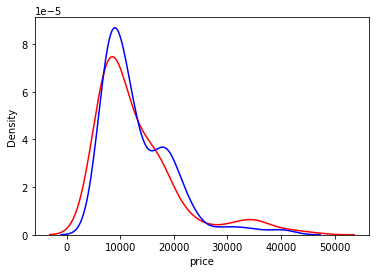

In [ ]:
# vẽ distribution plot
import seaborn as sns

ax1 = sns.distplot(df['price'], hist = False, color = "r", label = "Actual Value")
sns.distplot(Yhat_c3, hist = False, color = "b", label = "Fiited Values", ax = ax1)

## Mô hình câu 5

In [ ]:
# Tính R^ 2
lm_c5.score(Z_c5, df['price'])

0.8093562806577457

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


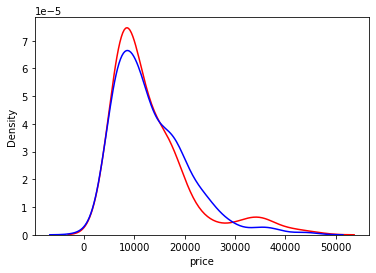

In [ ]:
# vẽ distribution plot

import seaborn as sns

ax1 = sns.distplot(df['price'], hist = False, color = "r", label = "Actual Value")
sns.distplot(Yhat_5, hist = False, color = "b", label = "Fiited Values", ax = ax1)

## Mô hình câu 7

In [ ]:
# Tính R^2
lm_c7.score(X_poly_c7, df['price'])

0.8463341969864728

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


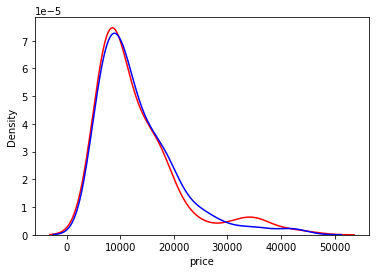

In [ ]:
import seaborn as sns

ax1 = sns.distplot(df['price'], hist = False, color = "r", label = "Actual Value")
sns.distplot(Yhat_7, hist = False, color = "b", label = "Fiited Values", ax = ax1)

## Mô hình câu 9

In [ ]:
# Tính R^ 2
pipe.score(Z_c9, df['price'])

0.8463341969864728

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


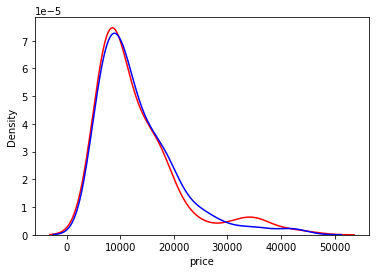

In [ ]:
import seaborn as sns

ax1 = sns.distplot(df['price'], hist = False, color = "r", label = "Actual Value")
sns.distplot(ypipe, hist = False, color = "b", label = "Fiited Values", ax = ax1)

- Ta thấy , sắp xếp R^2 của từng mô hình theo thứ tự tăng dần: c3<c5<c7=c9
- Tiếp tục so sánh distribution plot của từng mô hình các câu, được sắp xếp theo sự biến động lớn tới bé: c3>c5>c7=c9 ( distribution của câu 7 giống với câu 9)
=> Như vậy, mô hình hoạt động tốt được sắp xếp từ trên xuống:
1. Mô hình câu 7, câu 9
2. Mô hình câu 5
3. Mô hình câu 3

# Câu 12: Phát triển một mô hình tốt hơn mô hình ở câu 9 sử dụng mô hình Naive bayes

In [ ]:
pr_c12 = PolynomialFeatures(degree=2, include_bias=False)

x_c12 = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
X_poly_c12 = pr_c12.fit_transform(x_c12)
X_poly_c12.shape

(201, 14)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_poly_c12,df['price'])

Yhat_c12 = model.predict(X_poly_c12)
Yhat_c12

array([13495., 13495., 22018., 13950., 17450., 15250., 17710., 18920.,
       23875., 16430., 16430., 20970., 21105., 24565., 30760., 41315.,
       36880.,  5151.,  6295.,  6575.,  5572.,  6377.,  7957.,  6229.,
        6692.,  6692.,  8558.,  8921., 12964.,  6479.,  6855.,  5399.,
        6529.,  7129.,  7295.,  7295.,  7895.,  9095.,  9095., 10295.,
       12945., 10345.,  6785., 11048., 32250., 32250., 36000.,  5195.,
        6095.,  6795.,  6695.,  7395., 10945., 10945., 13645., 15645.,
       10595., 10245., 10595., 10245., 10795., 11245., 18280., 18344.,
       25552., 28248., 28176., 31600., 34184., 35056., 40960., 45400.,
       16503.,  5389.,  6189.,  6669.,  7689.,  9959.,  8499., 12629.,
       14869., 14489.,  6989.,  8189.,  9279.,  9279.,  5499.,  7099.,
        6649.,  6849.,  7349.,  7299.,  7799.,  7499.,  7999.,  8249.,
        8949.,  9549., 13499., 14399., 13499., 17199., 19699., 18399.,
       11900., 13200., 12440., 13860., 15580., 16900., 16695., 17075.,
      

In [ ]:
# Tính R^ 2
model.score(X_poly_c12, df['price'])

0.900497512437811

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


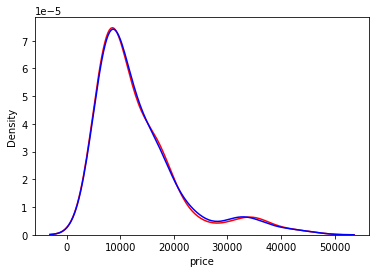

In [ ]:
import seaborn as sns

ax1 = sns.distplot(df['price'], hist = False, color = "r", label = "Actual Value")
sns.distplot(Yhat_c12, hist = False, color = "b", label = "Fiited Values", ax = ax1)

Từ kết quả R^2  = 0.9 > 0.84 ở mô hình câu 9, và distribution plot 2 đường gần như là một nên mô hình sử dụng Polynomial Naive bayes tốt hơn ở mô hình Polynomial LinearRegression ở các câu trước

# Câu 13: Viết hàm trả về kết quả dự đoán từ môt hoặc nhiều feature

In [ ]:
def Predict(feature):
  n = len(feature)
  if n == 1:
    model = LinearRegression()
    model.fit(df.loc[:,[feature]],df['price'])
    return model.predict(df.loc[:,[feature]])
  else:
    model = LinearRegression()
    model.fit(df.loc[:,feature],df['price'])
    return model.predict(df.loc[:,feature])

In [ ]:
list1 = ['curb-weight', 'horsepower']
Predict(list1)

array([13818.36874516, 13818.36874516, 19817.46181172, 11339.5591291 ,
       16372.67449185, 13402.99863237, 16089.44617337, 16966.32816005,
       20674.55498583, 11713.38280432, 11713.38280432, 15995.09957583,
       16433.54056917, 18745.32035222, 25540.8290414 , 26736.57720505,
       27733.03400809,  -209.11867233,  4815.65012609,  5094.65803094,
        4654.52887215,  4654.52887215,  9673.48335442,  5379.94942477,
        5555.3258221 ,  5555.3258221 , 10175.69758315, 11678.49476563,
       18925.01142609,  2469.82638707,  4908.4028211 ,  3635.37609847,
        5872.97300645,  6000.51947724,  6430.98881615,  6542.59197809,
        9117.90552997,  9540.40321446,  9659.97803083, 10202.05053168,
       12271.39861402, 10811.74177165,  9214.78437569, 13441.91855886,
       31673.93845179, 31673.93845179, 38363.00273828,  4766.13203409,
        4845.84857834,  4885.70685046,  5204.57302743,  5244.43129955,
       11593.80798796, 11593.80798796, 11633.66626008, 15560.50408621,
      